In [1]:
from sklearn.datasets import load_breast_cancer, load_wine, load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
import numpy as np

## 9.18

Plot the precision-recall curve for the data in 9.5

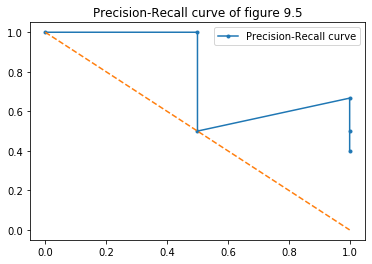

In [4]:
tpr = [1,1,1,.5,.5,0]
ppv = [2/5,2/4,2/3,1/2,1,1]
plt.plot(tpr, ppv,'.-',label="Precision-Recall curve")
plt.plot([0,1],[1,0],'--')
plt.legend()
plt.title("Precision-Recall curve of figure 9.5")
plt.show()

## 9.19
Plot a ROC curve and compute AUC for three probabalistic classifiers, applied to three of your favorite classification datasets

----- Analysis of Breast Cancer Data -----


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


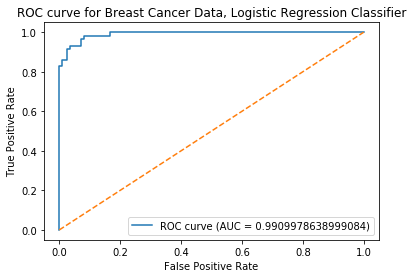

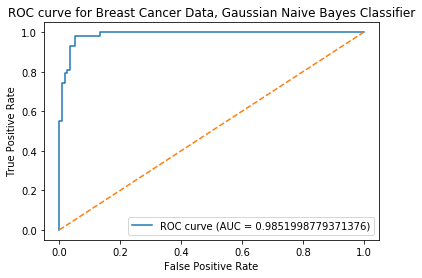

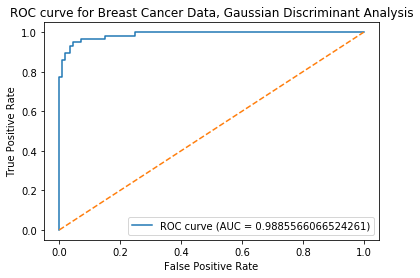

----- Analysis of Wine Data -----


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


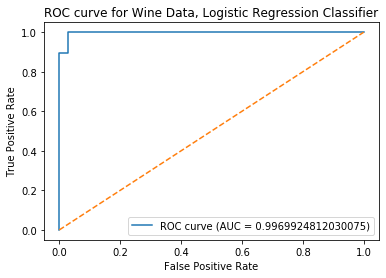

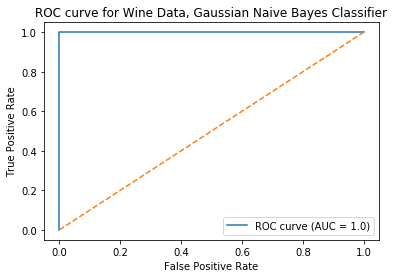

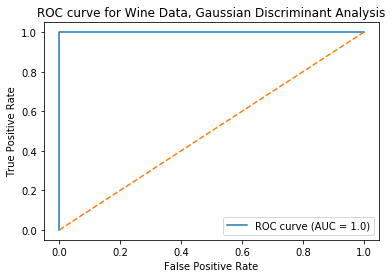

----- Analysis of Digits Data -----


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


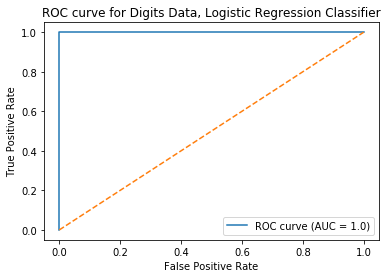

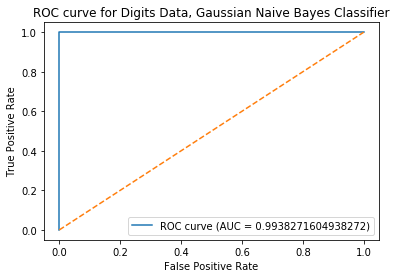

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:686: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


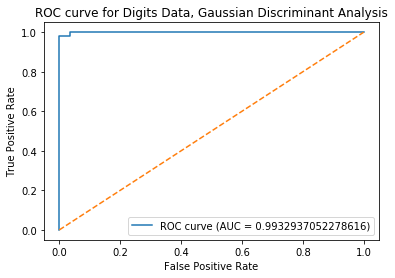

In [24]:
models = [LogisticRegression(), GaussianNB(), QuadraticDiscriminantAnalysis()]
model_names = ["Logistic Regression Classifier","Gaussian Naive Bayes Classifier", "Gaussian Discriminant Analysis"]
datasets = [load_breast_cancer(),load_wine(), load_digits()]
dataset_names = ["Breast Cancer Data","Wine Data","Digits Data"]

for dataset, data_name in zip(datasets,dataset_names):
    X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target,test_size=0.3)
    
    # convert to binary problem
    y_train, y_test = y_train == 0, y_test == 0
    
    print("----- Analysis of {} -----".format(data_name))
    
    for model, name in zip(models, model_names):        
        # Train model 
        model.fit(X_train,y_train)
        
        # Get test probabilities
        probas = model.predict_proba(X_test)[:,1]
        
        # Calculate Area Under Curve
        auc = roc_auc_score(y_test,probas)
        
        # Calculate and plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, probas)
        plt.step(fpr,tpr,label="ROC curve (AUC = {})".format(auc))
        plt.plot([0,1],[0,1],"--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.title("ROC curve for {}, {}".format(data_name, name))
        plt.show()

## 9.20


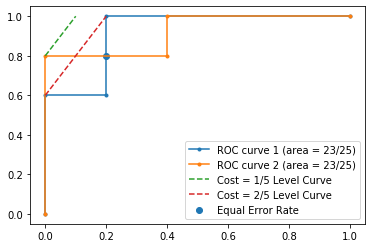

In [14]:
fpr1 = [1,1/5,1/5,0,0]
tpr1 = [1,1,3/5,3/5,0]

fpr2= [1,2/5,2/5,0,0,]
tpr2 = [1,1,4/5,4/5,0]


plt.plot(fpr1,tpr1,'.-',label="ROC curve 1 (area = 23/25)")
plt.plot(fpr2,tpr2,'.-',label="ROC curve 2 (area = 23/25)")
plt.scatter(1/5,4/5,label="Equal Error Rate")
plt.plot([0,.1],[.8,1],'--',label="Cost = 1/5 Level Curve")
plt.plot([0,.2],[.6,1],'--',label="Cost = 2/5 Level Curve")
plt.legend()
plt.show()

Thus, we see that the two ROC curves have the same AUC and EER, but the estimated cost of the blue curve is 2/5, while that of the orange curve is 1/5. 

(See scratch work for additional calculations)